In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]

In [4]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [5]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [6]:
pd.get_dummies(x['Geography'])

,France,Germany,Spain
0,True,False,False
1,False,False,True
2,True,False,False
3,True,False,False
4,False,False,True
...,...,...,...
9995,True,False,False
9996,True,False,False
9997,True,False,False
9998,False,True,False


In [7]:
#Feature Engineering
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [8]:
#Concatenate these variables with dataframe
x=x.drop(['Geography','Gender'],axis=1)

In [9]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [10]:
x=pd.concat([x,geography,gender],axis=1)

In [11]:
#splitting daytaset into train and test set
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [12]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [13]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [14]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [15]:
x_train.shape

(8000, 11)

In [18]:
#Lets Create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [44]:
# lets intiate the ANN
classifier=Sequential()

In [45]:
# adding the input layer
# in x_train we can see there are 11 inputs
classifier.add(Dense(units=11,activation='relu'))


In [46]:
# adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.3))

In [48]:
#adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.2))

In [49]:
# addig the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [50]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [51]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [52]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
#Early Stoping
import tensorflow as tf
early_stoppping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [56]:
model_history=classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stoppping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8546 - loss: 0.3534 - val_accuracy: 0.8523 - val_loss: 0.3722
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8569 - loss: 0.3653 - val_accuracy: 0.8512 - val_loss: 0.3700
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8453 - loss: 0.3775 - val_accuracy: 0.8557 - val_loss: 0.3670
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8548 - loss: 0.3707 - val_accuracy: 0.8535 - val_loss: 0.3651
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8600 - loss: 0.3435 - val_accuracy: 0.8501 - val_loss: 0.3703
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8569 - loss: 0.3663 - val_accuracy: 0.8459 - val_loss: 0.3755
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8539 - loss: 0.3679 - val_accuracy: 0.8429 - val_loss: 0.3796
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8483 - loss: 0.3652 - 

In [57]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

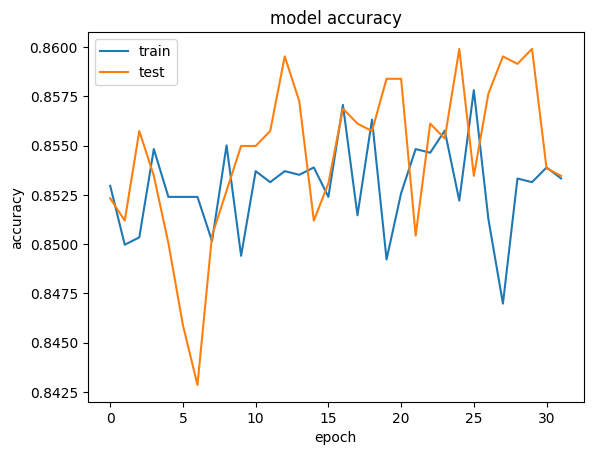

In [58]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

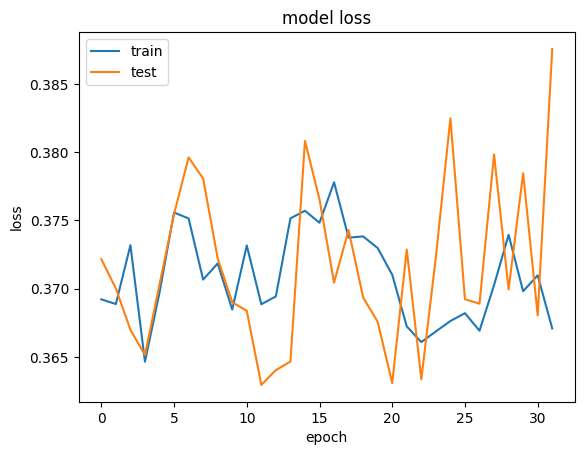

In [59]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [60]:
# making the predictons and evaluationg the model

# predicting the test set results
y_predict=classifier.predict(x_test)
y_predict=(y_predict>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [61]:
# confusion matrix

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predict)
cm

array([[1477,  118],
       [ 175,  230]])

In [62]:
# accuracy

from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_predict)
score

0.8535

In [63]:
# get the weights
classifier.get_weights()
# we can save this weights in pickle file

[array([[-4.4563568e-01, -1.0087582e-01,  7.4051309e-01,  4.7954115e-01,
         -6.2389728e-02,  2.1916149e-02, -7.6692469e-02, -2.2263315e+00,
          2.7872622e-01, -3.3296582e-01,  1.2235914e+00],
        [ 2.7928972e+00,  3.0158908e+00, -3.9132700e+00, -3.5576349e-01,
         -1.7311704e-01,  2.9217046e-02, -4.1662836e+00,  2.4347568e-01,
          3.2932907e-01, -2.1696498e+00, -2.0147643e+00],
        [ 2.0417033e-01,  1.5793674e-01, -6.2648511e-01,  2.1791883e+00,
          1.0113828e-01,  1.0889605e-01,  5.2775627e-01,  5.7558495e-01,
         -5.9435479e-02,  3.8847500e-01,  8.6498755e-01],
        [-1.0996674e+00,  3.2857010e-01, -1.9616947e+00, -1.3890989e+00,
         -5.0471168e+00, -5.7555282e-01, -7.0859182e-01, -5.0937390e-01,
         -4.8241820e+00,  3.1409850e+00, -2.9000566e+00],
        [-1.1176283e+00, -9.8322457e-01, -7.8548634e-01, -2.5999393e+00,
         -5.6505022e+00,  5.6407161e+00, -1.3021742e-01, -2.6647201e+00,
          1.2115799e+00, -6.2438303e-0